In [111]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets to inspect their content
train_df = pd.read_csv('Train Dataset .csv')
test_df = pd.read_csv('Test Dataset.csv')
variable_definitions_df = pd.read_csv('Variable_Definitions.csv')
sample_submission_df = pd.read_csv('Sample Submission.csv')

# Display the first few rows of each dataset to understand the structure
# train_df.head(), test_df.head(), variable_definitions_df.head(), sample_submission_df.head()


In [81]:
# !pip install catboost
# !pip install tensorflow
# !pip install --user tensorflow
# !pip install tensorflow --user --no-warn-script-location

# EXPLORATORY DATA ANALYSIS (EDA)

In [82]:
# Step 1: Check for missing values
missing_values = train_df.isnull().sum()

# Step 2: Summary statistics
summary_statistics = train_df.describe()

# Step 3: Distribution of the target variable
target_distribution = train_df['target'].value_counts(normalize=True)

# Step 4: Correlation matrix
correlation_matrix = train_df.corr()

# Display results
missing_values, summary_statistics, target_distribution, correlation_matrix

(Id          0
 Age         0
 Sex         0
 cp          0
 trestbps    0
 chol        0
 fbs         0
 restecg     0
 thalach     0
 exang       0
 oldpeak     0
 slope       0
 ca          0
 thal        0
 target      0
 dtype: int64,
                  Id          Age          Sex           cp     trestbps  \
 count   7303.000000  7303.000000  7303.000000  7303.000000  7303.000000   
 mean   15021.535396    53.172669     0.499658     1.502533   147.447487   
 std     2886.026080    14.185970     0.500034     1.115594    31.099538   
 min    10001.000000    29.000000     0.000000     0.000000    94.000000   
 25%    12521.500000    41.000000     0.000000     1.000000   120.000000   
 50%    15054.000000    53.000000     0.000000     1.000000   148.000000   
 75%    17513.500000    65.000000     1.000000     3.000000   174.000000   
 max    19998.000000    77.000000     1.000000     3.000000   200.000000   
 
               chol          fbs      restecg      thalach        exang  \

In [99]:
print(train_df.shape)
print(test_df.shape)
print(variable_definitions_df.shape)
print(sample_submission_df.shape)

(7303, 15)
(2697, 14)
(13, 1)
(2697, 1)


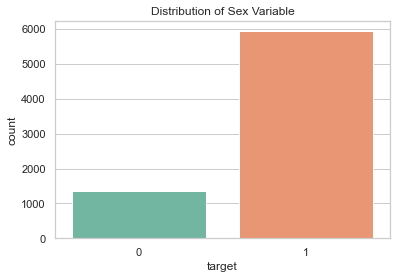

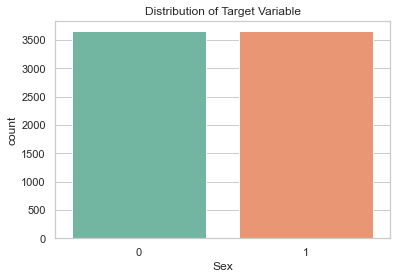

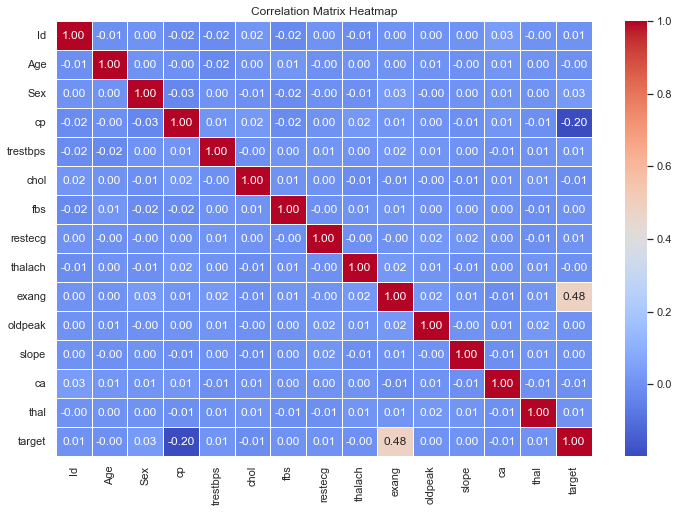

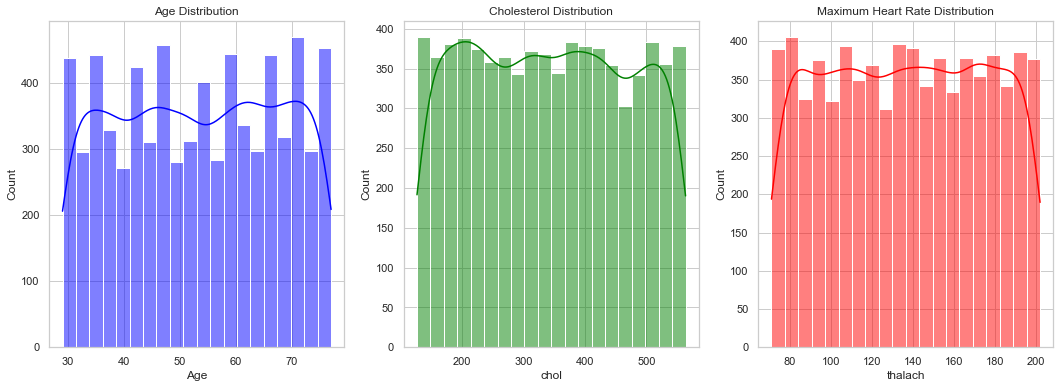

In [97]:
# Set up the plot style
sns.set(style="whitegrid")

# Step 1: Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=train_df, palette='Set2')
plt.title('Distribution of Sex Variable')
plt.show()

# Step 1: Plot the distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='Sex', data=train_df, palette='Set2')
plt.title('Distribution of Target Variable')
plt.show()

# Step 2: Correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

# Step 3: Distribution plots for key features (Age, Cholesterol, and Thalach)
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.histplot(train_df['Age'], kde=True, color='blue')
plt.title('Age Distribution')

plt.subplot(1, 3, 2)
sns.histplot(train_df['chol'], kde=True, color='green')
plt.title('Cholesterol Distribution')

plt.subplot(1, 3, 3)
sns.histplot(train_df['thalach'], kde=True, color='red')
plt.title('Maximum Heart Rate Distribution')

plt.show()


# Building the Model

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# import os

# Defining the features and target we're trying to predict
X = train_df.drop(columns=['target'])
y = train_df['target']

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (if required)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_X_scaled = scaler.transform(test_df)  

# Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, silent=True),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Extra Trees Classifier": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(max_iter=1000, random_state=42),
    "Passive-Aggressive Classifier": PassiveAggressiveClassifier(max_iter=1000, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)
}

# Dictionary to store accuracy results
validation_accuracies = {}

# Define paths
submission_folder = 'Submission'
if not os.path.exists(submission_folder):
    os.makedirs(submission_folder)

# Train, validate, store accuracies, save each model, and prepare submission files
for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies[model_name] = accuracy
    print(f"{model_name} Validation Accuracy: {accuracy}")
    

    # Make predictions on the test set
    test_predictions = model.predict(test_X_scaled)
    
    # Prepare the submission file
    submission_df = sample_submission_df.copy()
    submission_df['target'] = test_predictions
    
    # Save the submission file
    submission_filename = os.path.join(submission_folder, f"{model_name.replace(' ', '_').lower()}_submission.csv")
    submission_df.to_csv(submission_filename, index=False)
    print(f"Submission file for {model_name} saved as {submission_filename}")

# Print validation accuracies
print("\nValidation Accuracies:")
for model_name, accuracy in validation_accuracies.items():
    print(f"{model_name}: {accuracy}")


### Optimising the model using Gridsearch

In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
import os

# Defining the features and target we're trying to predict
X = train_df.drop(columns=['target'])
y = train_df['target']

# Split the data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
test_X_scaled = scaler.transform(test_df)  

# Initialize base models (models to optimize)
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "XGBoost": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss')
}

# Define hyperparameter grids for tuning
param_grids = {
    "Logistic Regression": {
        'C': [0.1, 1.0, 10],
        'solver': ['lbfgs', 'liblinear']
    },
    "Random Forest": {
        'n_estimators': [100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10]
    },
    "XGBoost": {
        'n_estimators': [50, 100],
        'max_depth': [3, 6, 9],
        'learning_rate': [0.01, 0.1, 0.2]
    }
}

# Dictionary to store accuracy results
validation_accuracies = {}

# Define paths
submission_folder = 'Submission'
if not os.path.exists(submission_folder):
    os.makedirs(submission_folder)

# Perform GridSearchCV optimization
optimized_models = {}
for model_name, model in models.items():
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(estimator=model, param_grid=param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled, y_train)
    
    # Store the best model
    best_model = grid_search.best_estimator_
    optimized_models[model_name] = best_model
    
    # Predict on validation set
    y_val_pred = best_model.predict(X_val_scaled)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies[model_name] = accuracy
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} Validation Accuracy: {accuracy}")
    
    # Make predictions on the test set
    test_predictions = best_model.predict(test_X_scaled)
    
    # Prepare the submission file
    submission_df = sample_submission_df.copy()
    submission_df['target'] = test_predictions
    
    # Save the submission file
    submission_filename = os.path.join(submission_folder, f"{model_name.replace(' ', '_').lower()}_optimized_submission.csv")
    submission_df.to_csv(submission_filename, index=False)
    print(f"Submission file for {model_name} saved as {submission_filename}")

# Print validation accuracies
print("\nValidation Accuracies:")
for model_name, accuracy in validation_accuracies.items():
    print(f"{model_name}: {accuracy}")


## Important Features

In [84]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# Define the features and target
X = train_df.drop(columns=['Id', 'target'])
y = train_df['target']

# Initialize and train a Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X, y)

# Get the feature importances
feature_importances = rf_model.feature_importances_
features = X.columns

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': feature_importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Display the top features
feature_importance_df


,Feature,Importance
8,exang,0.256248
2,cp,0.127415
4,chol,0.100503
7,thalach,0.094949
3,trestbps,0.094622
9,oldpeak,0.089479
0,Age,0.083634
11,ca,0.039385
12,thal,0.031795
6,restecg,0.025715


### Building the model with Important Features

In [14]:
# Re-import necessary libraries and load the dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier, BaggingClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score


# Define the features and target
X = train_df.drop(columns=['Id', 'target'])
y = train_df['target']

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Rename columns in the test dataset to match the training dataset
test_df.rename(columns={'age': 'Age', 'sex': 'Sex'}, inplace=True)

# Step 1: Select the top important features (based on Random Forest importance)
important_features = ['exang', 'cp', 'chol', 'thalach', 'trestbps', 'oldpeak', 'Age']

# Use only the important features in the training and validation sets
X_train_imp = X_train[important_features]
X_val_imp = X_val[important_features]
test_X_imp = test_df[important_features]

# Step 2: Scale the important features
scaler = StandardScaler()
X_train_scaled_imp = scaler.fit_transform(X_train_imp)
X_val_scaled_imp = scaler.transform(X_val_imp)
test_X_scaled_imp = scaler.transform(test_X_imp)

# Step 3: Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, silent=True),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Extra Trees Classifier": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(max_iter=1000, random_state=42),
    "Passive-Aggressive Classifier": PassiveAggressiveClassifier(max_iter=1000, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)
}

# Train, validate, and store accuracies using only the important features
validation_accuracies = {}

for model_name, model in models.items():
    print(f"Training {model_name} with important features...")
    model.fit(X_train_scaled_imp, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val_scaled_imp)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    validation_accuracies[model_name] = accuracy
    print(f"{model_name} Validation Accuracy: {accuracy}")
    
    # Make predictions on the test set
    test_predictions = model.predict(test_X_scaled_imp)
    
    # Prepare the submission file
    submission_df = sample_submission_df.copy()
    submission_df['target'] = test_predictions
    
    # Save the submission file
    submission_filename = f"{model_name.replace(' ', '_').lower()}_important_features_submission.csv"
    submission_df.to_csv(submission_filename, index=False)
    print(f"Submission file for {model_name} saved as {submission_filename}")

# Print validation accuracies
validation_accuracies


Training Logistic Regression with important features...
Logistic Regression Validation Accuracy: 0.8254620123203286
Submission file for Logistic Regression saved as logistic_regression_important_features_submission.csv
Training Decision Tree with important features...
Decision Tree Validation Accuracy: 0.8206707734428473
Submission file for Decision Tree saved as decision_tree_important_features_submission.csv
Training Random Forest with important features...
Random Forest Validation Accuracy: 0.811772758384668
Submission file for Random Forest saved as random_forest_important_features_submission.csv
Training XGBoost with important features...
XGBoost Validation Accuracy: 0.8240930869267625
Submission file for XGBoost saved as xgboost_important_features_submission.csv
Training LightGBM with important features...


C:\Users\olumide.ogundeji\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [19:40:29] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 4740, number of negative: 1102
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001005 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 5842, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.811366 -> initscore=1.458910
[LightGBM] [Info] Start training from score 1.458910
LightGBM Validation Accuracy: 0.8165639972621492
Submission file for LightGBM saved as lightgbm_important_features_submission.csv
Training CatBoost with important features...
CatBoost Validation Accuracy: 0.8261464750171116
Submission file for CatBoost saved as catboost_important_features_submission.csv
Training SVM with important features...
SVM Validation Accuracy: 0.8165639972621492
Submission file for SVM saved as svm_important_features_subm

C:\Users\olumide.ogundeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Quadratic Discriminant Analysis Validation Accuracy: 0.6947296372347707
Submission file for Quadratic Discriminant Analysis saved as quadratic_discriminant_analysis_important_features_submission.csv
Training Ridge Classifier with important features...
Ridge Classifier Validation Accuracy: 0.8220396988364134
Submission file for Ridge Classifier saved as ridge_classifier_important_features_submission.csv
Training SGD Classifier with important features...
SGD Classifier Validation Accuracy: 0.8220396988364134
Submission file for SGD Classifier saved as sgd_classifier_important_features_submission.csv
Training Passive-Aggressive Classifier with important features...
Passive-Aggressive Classifier Validation Accuracy: 0.7768651608487337
Submission file for Passive-Aggressive Classifier saved as passive-aggressive_classifier_important_features_submission.csv
Training MLP with important features...
MLP Validation Accuracy: 0.8213552361396304
Submission file for MLP saved as mlp_important_featu

C:\Users\olumide.ogundeji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


{'Logistic Regression': 0.8254620123203286,
 'Decision Tree': 0.8206707734428473,
 'Random Forest': 0.811772758384668,
 'XGBoost': 0.8240930869267625,
 'LightGBM': 0.8165639972621492,
 'CatBoost': 0.8261464750171116,
 'SVM': 0.8165639972621492,
 'KNN': 0.8151950718685832,
 'AdaBoost': 0.8062970568104039,
 'Gradient Boosting': 0.812457221081451,
 'Gaussian Naive Bayes': 0.6947296372347707,
 'Extra Trees Classifier': 0.8165639972621492,
 'HistGradientBoosting': 0.8193018480492813,
 'Bagging Classifier': 0.8069815195071869,
 'Linear Discriminant Analysis': 0.8254620123203286,
 'Quadratic Discriminant Analysis': 0.6947296372347707,
 'Ridge Classifier': 0.8220396988364134,
 'SGD Classifier': 0.8220396988364134,
 'Passive-Aggressive Classifier': 0.7768651608487337,
 'MLP': 0.8213552361396304}

### Optimising the Important features with RandomizedSearchCV

In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
import xgboost as xgb
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Step 1: Load and preprocess the dataset
train_df = pd.read_csv('Train Dataset .csv')
test_df = pd.read_csv('Test Dataset.csv')
sample_submission_df = pd.read_csv('Sample Submission.csv')

# Define the features and target
X = train_df.drop(columns=['Id', 'target'])
y = train_df['target']

# Rename columns in the test dataset to match the training dataset
test_df.rename(columns={'age': 'Age', 'sex': 'Sex'}, inplace=True)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Select the top important features (based on Random Forest importance)
important_features = ['exang', 'cp', 'chol', 'thalach', 'trestbps', 'oldpeak', 'Age']

# Use only the important features in the training and validation sets
X_train_imp = X_train[important_features]
X_val_imp = X_val[important_features]
test_X_imp = test_df[important_features]

# Step 3: Scale the important features
scaler = StandardScaler()
X_train_scaled_imp = scaler.fit_transform(X_train_imp)
X_val_scaled_imp = scaler.transform(X_val_imp)
test_X_scaled_imp = scaler.transform(test_X_imp)

# Step 4: Hyperparameter Tuning using RandomizedSearchCV

# Define hyperparameter grids
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'bootstrap': [True, False]
}

param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

param_grid_svm = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto']
}

param_grid_lgbm = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [-1, 3, 5, 10],
    'num_leaves': [31, 50, 100]
}

# Initialize RandomizedSearchCV for Random Forest
random_search_rf = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42), param_distributions=param_grid_rf, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)

# Initialize RandomizedSearchCV for XGBoost (with corrected syntax)
random_search_xgb = RandomizedSearchCV(estimator=xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'), param_distributions=param_grid_xgb,n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search_svm = RandomizedSearchCV(estimator=SVC(probability=True, random_state=42), param_distributions=param_grid_svm, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search_lgbm = RandomizedSearchCV(estimator=LGBMClassifier(random_state=42), param_distributions=param_grid_lgbm, n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)

# Step 5: Train and evaluate models using the optimized hyperparameters

# Function to train and evaluate the models
def evaluate_model(model_name, model):
    model.fit(X_train_scaled_imp, y_train)
    
    # Predict on validation set
    y_val_pred = model.predict(X_val_scaled_imp)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    
    # Make predictions on the test set
    test_predictions = model.predict(test_X_scaled_imp)
    
    # Prepare the submission file
    submission_df = sample_submission_df.copy()
    submission_df['target'] = test_predictions
    
    # Save the submission file
    submission_filename = f"{model_name.replace(' ', '_').lower()}_optimized_important_features_submission.csv"
    submission_df.to_csv(submission_filename, index=False)
    print(f"Submission file for {model_name} saved as {submission_filename}")
    
    return accuracy

# Train and evaluate Random Forest
print("Optimizing Random Forest...")
random_search_rf.fit(X_train_scaled_imp, y_train)
rf_accuracy = evaluate_model("Random Forest", random_search_rf.best_estimator_)
print(f"Random Forest Validation Accuracy: {rf_accuracy}")

# Train and evaluate XGBoost
print("Optimizing XGBoost...")
random_search_xgb.fit(X_train_scaled_imp, y_train)
xgb_accuracy = evaluate_model("XGBoost", random_search_xgb.best_estimator_)
print(f"XGBoost Validation Accuracy: {xgb_accuracy}")

# Train and evaluate SVM
print("Optimizing SVM...")
random_search_svm.fit(X_train_scaled_imp, y_train)
svm_accuracy = evaluate_model("SVM", random_search_svm.best_estimator_)
print(f"SVM Validation Accuracy: {svm_accuracy}")

# Train and evaluate LightGBM
print("Optimizing LightGBM...")
random_search_lgbm.fit(X_train_scaled_imp, y_train)
lgbm_accuracy = evaluate_model("LightGBM", random_search_lgbm.best_estimator_)
print(f"LightGBM Validation Accuracy: {lgbm_accuracy}")

# Print validation accuracies
validation_accuracies = {
    "Random Forest": rf_accuracy,
    "XGBoost": xgb_accuracy,
    "SVM": svm_accuracy,
    "LightGBM": lgbm_accuracy
}

print("\nFinal Validation Accuracies:")
for model_name, accuracy in validation_accuracies.items():
    print(f"{model_name}: {accuracy}")


Optimizing Random Forest...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Submission file for Random Forest saved as random_forest_optimized_important_features_submission.csv
Random Forest Validation Accuracy: 0.8151950718685832
Optimizing XGBoost...
Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\olumide.ogundeji\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [08:58:45] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Submission file for XGBoost saved as xgboost_optimized_important_features_submission.csv
XGBoost Validation Accuracy: 0.8220396988364134
Optimizing SVM...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
Submission file for SVM saved as svm_optimized_important_features_submission.csv
SVM Validation Accuracy: 0.8220396988364134
Optimizing LightGBM...
Fitting 3 folds for each of 10 candidates, totalling 30 fits
[LightGBM] [Info] Number of positive: 4740, number of negative: 1102
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 5842, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.811366 -> initscore=1.458910
[LightGBM] [Info] Start training from score 1.458910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [W

[LightGBM] [Info] Number of positive: 4740, number of negative: 1102
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000797 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 614
[LightGBM] [Info] Number of data points in the train set: 5842, number of used features: 7
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.811366 -> initscore=1.458910
[LightGBM] [Info] Start training from score 1.458910
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf

### Combining Multiple Models Using Staking and Voting

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import VotingClassifier, BaggingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

# Load and preprocess the dataset
train_df = pd.read_csv('Train Dataset .csv')
test_df = pd.read_csv('Test Dataset.csv')
sample_submission_df = pd.read_csv('Sample Submission.csv')

# Define the features and target
X = train_df.drop(columns=['Id', 'target'])
y = train_df['target']

# Rename columns in the test dataset to match the training dataset
test_df.rename(columns={'age': 'Age', 'sex': 'Sex'}, inplace=True)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Select the top important features (based on Random Forest importance)
important_features = ['exang', 'cp', 'chol', 'thalach', 'trestbps', 'oldpeak', 'Age']

# Use only the important features in the training and validation sets
X_train_imp = X_train[important_features]
X_val_imp = X_val[important_features]
test_X_imp = test_df[important_features]

# Scale the important features
scaler = StandardScaler()
X_train_scaled_imp = scaler.fit_transform(X_train_imp)
X_val_scaled_imp = scaler.transform(X_val_imp)
test_X_scaled_imp = scaler.transform(test_X_imp)

# Initialize base models for VotingClassifier
log_clf = LogisticRegression(random_state=42)
svm_clf = SVC(probability=True, random_state=42)  # Soft voting requires probability estimates
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(n_estimators=100, random_state=42, use_label_encoder=False, eval_metric='logloss')

# Build VotingClassifier (soft voting)
voting_clf = VotingClassifier(estimators=[
    ('lr', log_clf),
    ('svm', svm_clf),
    ('rf', rf_clf),
    ('xgb', xgb_clf)
], voting='soft')

# Train and evaluate the VotingClassifier
voting_clf.fit(X_train_scaled_imp, y_train)

# Predict on validation set
y_val_pred_voting = voting_clf.predict(X_val_scaled_imp)

# Calculate accuracy for voting
voting_accuracy = accuracy_score(y_val, y_val_pred_voting)
print(f"Voting Classifier Validation Accuracy: {voting_accuracy}")

#  Make predictions on the test set using VotingClassifier
test_predictions_voting = voting_clf.predict(test_X_scaled_imp)

# Prepare the submission file for VotingClassifier
submission_voting_df = sample_submission_df.copy()
submission_voting_df['target'] = test_predictions_voting

# Save the VotingClassifier submission file
submission_filename_voting = "important_features_voting_classifier_submission.csv"
submission_voting_df.to_csv(submission_filename_voting, index=False)
print(f"VotingClassifier submission file saved as {submission_filename_voting}")

# Build BaggingClassifier using DecisionTree as the base estimator
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42), 
                                n_estimators=100, random_state=42)

# Train and evaluate the BaggingClassifier
bagging_clf.fit(X_train_scaled_imp, y_train)

# Predict on validation set
y_val_pred_bagging = bagging_clf.predict(X_val_scaled_imp)

# Calculate accuracy for bagging
bagging_accuracy = accuracy_score(y_val, y_val_pred_bagging)
print(f"Bagging Classifier Validation Accuracy: {bagging_accuracy}")

# Make predictions on the test set using BaggingClassifier
test_predictions_bagging = bagging_clf.predict(test_X_scaled_imp)

# Prepare the submission file for BaggingClassifier
submission_bagging_df = sample_submission_df.copy()
submission_bagging_df['target'] = test_predictions_bagging

# Save the BaggingClassifier submission file
submission_filename_bagging = "important_features_bagging_classifier_submission.csv"
submission_bagging_df.to_csv(submission_filename_bagging, index=False)
print(f"BaggingClassifier submission file saved as {submission_filename_bagging}")

# Step 10: Print final accuracies
print("\nFinal Validation Accuracies:")
print(f"Voting Classifier: {voting_accuracy}")
print(f"Bagging Classifier: {bagging_accuracy}")


C:\Users\olumide.ogundeji\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:16:20] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Voting Classifier Validation Accuracy: 0.8199863107460643
VotingClassifier submission file saved as important_features_voting_classifier_submission.csv
Bagging Classifier Validation Accuracy: 0.8069815195071869
BaggingClassifier submission file saved as important_features_bagging_classifier_submission.csv

Final Validation Accuracies:
Voting Classifier: 0.8199863107460643
Bagging Classifier: 0.8069815195071869


# FEATURE ENGINEERING

In [115]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Load the train and test datasets
train_df = pd.read_csv('Train Dataset .csv')
test_df = pd.read_csv('Test Dataset.csv')

# Check the column names to ensure 'Age' and other expected columns are present
print("Train dataset columns:", train_df.columns)
print("Test dataset columns:", test_df.columns)

# If 'Age' is not present, rename or use the correct column
train_df.rename(columns={'age': 'Age'}, inplace=True)
test_df.rename(columns={'age': 'Age'}, inplace=True)

# Categorical features to encode: 'cp', 'restecg', 'slope', 'thal'
categorical_features = ['cp', 'restecg', 'slope', 'thal']

#  One-Hot Encoding of categorical features
encoder = OneHotEncoder(sparse=False, drop='first')

# Apply one-hot encoding to both train and test datasets
encoded_train_categorical = encoder.fit_transform(train_df[categorical_features])
encoded_test_categorical = encoder.transform(test_df[categorical_features])

# Convert the encoded features into DataFrames
encoded_train_df = pd.DataFrame(encoded_train_categorical, columns=encoder.get_feature_names_out(categorical_features))
encoded_test_df = pd.DataFrame(encoded_test_categorical, columns=encoder.get_feature_names_out(categorical_features))

# Drop the original categorical features and append the new encoded features
train_df_encoded = pd.concat([train_df.drop(columns=categorical_features), encoded_train_df], axis=1)
test_df_encoded = pd.concat([test_df.drop(columns=categorical_features), encoded_test_df], axis=1)

#  Create interaction features for both train and test datasets
# Interaction Feature: Age and Cholesterol
train_df_encoded['age_chol_ratio'] = train_df_encoded['Age'] / train_df_encoded['chol'].replace(0, 1)  # Avoid division by zero
test_df_encoded['age_chol_ratio'] = test_df_encoded['Age'] / test_df_encoded['chol'].replace(0, 1)

# Interaction Feature: Exercise-Induced Angina and Maximum Heart Rate
train_df_encoded['exang_thalach_product'] = train_df_encoded['exang'] * train_df_encoded['thalach']
test_df_encoded['exang_thalach_product'] = test_df_encoded['exang'] * test_df_encoded['thalach']

# Interaction Feature: Blood Pressure and Age
train_df_encoded['age_trestbps_product'] = train_df_encoded['Age'] * train_df_encoded['trestbps']
test_df_encoded['age_trestbps_product'] = test_df_encoded['Age'] * test_df_encoded['trestbps']

# Interaction Feature: Chest Pain Type and ST Depression (for 'cp_2' column)
if 'cp_2' in train_df_encoded.columns:
    train_df_encoded['cp_oldpeak_product'] = train_df_encoded['cp_2'] * train_df_encoded['oldpeak']
else:
    train_df_encoded['cp_oldpeak_product'] = 0  # If 'cp_2' doesn't exist

if 'cp_2' in test_df_encoded.columns:
    test_df_encoded['cp_oldpeak_product'] = test_df_encoded['cp_2'] * test_df_encoded['oldpeak']
else:
    test_df_encoded['cp_oldpeak_product'] = 0  # If 'cp_2' doesn't exist

# Interaction Feature: Maximum Heart Rate and Age
train_df_encoded['thalach_age_ratio'] = train_df_encoded['thalach'] / train_df_encoded['Age'].replace(0, 1)
test_df_encoded['thalach_age_ratio'] = test_df_encoded['thalach'] / test_df_encoded['Age'].replace(0, 1)

# Scale numeric features for both train and test datasets
scaler = StandardScaler()
numeric_features = ['trestbps', 'chol', 'oldpeak', 'thalach_age_ratio', 'age_chol_ratio', 'age_trestbps_product']

# Apply scaling to both datasets
train_df_encoded[numeric_features] = scaler.fit_transform(train_df_encoded[numeric_features])
test_df_encoded[numeric_features] = scaler.transform(test_df_encoded[numeric_features])

# Display the updated datasets with new interaction features
print("Train dataset with interaction features:")
print(train_df_encoded.head())

print("Test dataset with interaction features:")
print(test_df_encoded.head())


Train dataset columns: Index(['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Test dataset columns: Index(['id', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal'],
      dtype='object')
Train dataset with interaction features:
      Id  Age  Sex  trestbps      chol  fbs  thalach  exang   oldpeak  ca  \
0  16167   33    0  0.339337 -1.082671    1      154      0 -0.910004   4   
1  11275   53    1  1.625618 -1.483352    0      104      0 -1.300839   1   
2  13251   37    1 -1.493613 -1.106241    1      155      0 -0.575002   3   
3  19921   75    0 -1.107729 -0.289166    1       88      1  0.988337   2   
4  11293   35    1 -0.271646  0.598618    1      166      1 -1.245005   4   

   ...  slope_1  slope_2  thal_1  thal_2  thal_3  age_chol_ratio  \
0  ...      1.0      0.0     1.0     0.0     0.0       -0.22960

### Building the model with new engineered features

In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import ExtraTreesClassifier, HistGradientBoostingClassifier

#  Split the data into features (X) and target (y)
X_encoded = train_df_encoded.drop(columns=['target'])  # Assuming 'target' is the label column
y_encoded = train_df_encoded['target']

# Split the data into training and validation sets
X_train_encoded, X_val_encoded, y_train_encoded, y_val_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled_encoded = scaler.fit_transform(X_train_encoded)
X_val_scaled_encoded = scaler.transform(X_val_encoded)
test_X_scaled_encoded = scaler.transform(test_df_encoded)

#  Initialize models
models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "XGBoost": xgb.XGBClassifier(n_estimators=50, random_state=42, use_label_encoder=False, eval_metric='logloss'),
    "LightGBM": GradientBoostingClassifier(n_estimators=100, random_state=42),  # Used as a replacement for LGBM
    "CatBoost": CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, silent=True),
    "SVM": SVC(probability=True, random_state=42),
    "KNN": KNeighborsClassifier(),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "Gaussian Naive Bayes": GaussianNB(),
    "Extra Trees Classifier": ExtraTreesClassifier(n_estimators=200, random_state=42),
    "HistGradientBoosting": HistGradientBoostingClassifier(random_state=42),
    "Bagging Classifier": BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42),
    "Linear Discriminant Analysis": LinearDiscriminantAnalysis(),
    "Quadratic Discriminant Analysis": QuadraticDiscriminantAnalysis(),
    "Ridge Classifier": RidgeClassifier(),
    "SGD Classifier": SGDClassifier(max_iter=1000, random_state=42),
    "Passive-Aggressive Classifier": PassiveAggressiveClassifier(max_iter=1000, random_state=42),
    "MLP": MLPClassifier(hidden_layer_sizes=(64, 32), max_iter=200, random_state=42)
}

# Train, validate, and store accuracies
validation_accuracies_encoded = {}

for model_name, model in models.items():
    print(f"Training {model_name} with encoded features...")
    model.fit(X_train_scaled_encoded, y_train_encoded)
    
    # Predict on validation set
    y_val_pred_encoded = model.predict(X_val_scaled_encoded)
    
    # Calculate accuracy
    accuracy_encoded = accuracy_score(y_val_encoded, y_val_pred_encoded)
    validation_accuracies_encoded[model_name] = accuracy_encoded
    print(f"{model_name} Validation Accuracy (encoded): {accuracy_encoded}")
    
    # Make predictions on the test set
    test_predictions_encoded = model.predict(test_X_scaled_encoded)
    
    # Prepare the submission file (assuming you have a 'sample_submission_df' to use)
    submission_df = sample_submission_df.copy()
    submission_df['target'] = test_predictions_encoded
    
    # Save the submission file
    submission_filename_encoded = f"{model_name.replace(' ', '_').lower()}_encoded_features_submission.csv"
    submission_df.to_csv(submission_filename_encoded, index=False)
    print(f"Submission file for {model_name} saved as {submission_filename_encoded}")

# Step 8: Print validation accuracies for the encoded dataset
print("\nValidation Accuracies:")
for model_name, accuracy in validation_accuracies_encoded.items():
    print(f"{model_name}: {accuracy}")


C:\Users\olumide.ogundeji\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
- sex
Feature names seen at fit time, yet now missing:
- Id
- Sex

  warnings.warn(message, FutureWarning)


Training Logistic Regression with encoded features...
Logistic Regression Validation Accuracy (encoded): 0.8083504449007529
Submission file for Logistic Regression saved as logistic_regression_encoded_features_submission.csv
Training Decision Tree with encoded features...
Decision Tree Validation Accuracy (encoded): 0.813141683778234
Submission file for Decision Tree saved as decision_tree_encoded_features_submission.csv
Training Random Forest with encoded features...
Random Forest Validation Accuracy (encoded): 0.8240930869267625
Submission file for Random Forest saved as random_forest_encoded_features_submission.csv
Training XGBoost with encoded features...
XGBoost Validation Accuracy (encoded): 0.8254620123203286


C:\Users\olumide.ogundeji\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [10:37:12] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Submission file for XGBoost saved as xgboost_encoded_features_submission.csv
Training LightGBM with encoded features...
LightGBM Validation Accuracy (encoded): 0.810403832991102
Submission file for LightGBM saved as lightgbm_encoded_features_submission.csv
Training CatBoost with encoded features...
CatBoost Validation Accuracy (encoded): 0.8138261464750172
Submission file for CatBoost saved as catboost_encoded_features_submission.csv
Training SVM with encoded features...
SVM Validation Accuracy (encoded): 0.8193018480492813
Submission file for SVM saved as svm_encoded_features_submission.csv
Training KNN with encoded features...
KNN Validation Accuracy (encoded): 0.8302532511978097
Submission file for KNN saved as knn_encoded_features_submission.csv
Training AdaBoost with encoded features...
AdaBoost Validation Accuracy (encoded): 0.8240930869267625
Submission file for AdaBoost saved as adaboost_encoded_features_submission.csv
Training Gradient Boosting with encoded features...
Gradien

C:\Users\olumide.ogundeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Submission file for Ridge Classifier saved as ridge_classifier_encoded_features_submission.csv
Training SGD Classifier with encoded features...
SGD Classifier Validation Accuracy (encoded): 0.811088295687885
Submission file for SGD Classifier saved as sgd_classifier_encoded_features_submission.csv
Training Passive-Aggressive Classifier with encoded features...
Passive-Aggressive Classifier Validation Accuracy (encoded): 0.809719370294319
Submission file for Passive-Aggressive Classifier saved as passive-aggressive_classifier_encoded_features_submission.csv
Training MLP with encoded features...
MLP Validation Accuracy (encoded): 0.8138261464750172
Submission file for MLP saved as mlp_encoded_features_submission.csv

Validation Accuracies:
Logistic Regression: 0.8083504449007529
Decision Tree: 0.813141683778234
Random Forest: 0.8240930869267625
XGBoost: 0.8254620123203286
LightGBM: 0.810403832991102
CatBoost: 0.8138261464750172
SVM: 0.8193018480492813
KNN: 0.8302532511978097
AdaBoost: 0.

C:\Users\olumide.ogundeji\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [102]:
from sklearn.ensemble import VotingClassifier

# Step 1: Initialize the base models
models_for_voting = [
    ('pac', PassiveAggressiveClassifier(max_iter=1000, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('cat', CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, silent=True))
]

# Step 2: Build the Voting Classifier (hard voting for non-probabilistic models)
voting_clf = VotingClassifier(estimators=models_for_voting, voting='hard')  # Use hard voting

# Train the voting classifier
voting_clf.fit(X_train_scaled_encoded, y_train_encoded)

# Step 3: Predict on validation set
y_val_pred_voting = voting_clf.predict(X_val_scaled_encoded)

# Calculate accuracy
voting_accuracy = accuracy_score(y_val_encoded, y_val_pred_voting)
print(f"Voting Classifier Validation Accuracy: {voting_accuracy}")

# Step 4: Make predictions on the test set
test_predictions_voting = voting_clf.predict(test_X_scaled_encoded)

# Prepare submission file
submission_df_voting = sample_submission_df.copy()  # Assuming 'sample_submission_df' exists
submission_df_voting['target'] = test_predictions_voting

# Save the submission file for voting classifier
submission_filename_voting = "selected_models_voting_classifier_submission.csv"
submission_df_voting.to_csv(submission_filename_voting, index=False)
print(f"Submission file for Voting Classifier saved as {submission_filename_voting}")


Voting Classifier Validation Accuracy: 0.8295687885010267
Submission file for Voting Classifier saved as selected_models_voting_classifier_submission.csv


In [103]:
from sklearn.ensemble import VotingClassifier

# Step 1: Initialize the base models (without Passive-Aggressive Classifier)
models_for_voting = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('lr', LogisticRegression(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('cat', CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6, random_state=42, silent=True))
]

# Step 2: Build the Voting Classifier (soft voting for probabilistic models)
voting_clf = VotingClassifier(estimators=models_for_voting, voting='soft')  # Use soft voting

# Train the voting classifier
voting_clf.fit(X_train_scaled_encoded, y_train_encoded)

# Step 3: Predict on validation set
y_val_pred_voting = voting_clf.predict(X_val_scaled_encoded)

# Calculate accuracy
voting_accuracy = accuracy_score(y_val_encoded, y_val_pred_voting)
print(f"Voting Classifier Validation Accuracy: {voting_accuracy}")

# Step 4: Make predictions on the test set
test_predictions_voting = voting_clf.predict(test_X_scaled_encoded)

# Prepare submission file
submission_df_voting = sample_submission_df.copy()  # Assuming 'sample_submission_df' exists
submission_df_voting['target'] = test_predictions_voting

# Save the submission file for voting classifier
submission_filename_voting = "selected_models_soft_voting_classifier_submission.csv"
submission_df_voting.to_csv(submission_filename_voting, index=False)
print(f"Submission file for Voting Classifier saved as {submission_filename_voting}")


Voting Classifier Validation Accuracy: 0.8275154004106776
Submission file for Voting Classifier saved as selected_models_soft_voting_classifier_submission.csv


In [104]:
from sklearn.ensemble import BaggingClassifier
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score

# Step 1: Initialize a Bagging Classifier with Passive-Aggressive Classifier as the base estimator
bagging_pac_clf = BaggingClassifier(
    base_estimator=PassiveAggressiveClassifier(max_iter=1000, random_state=42),
    n_estimators=10,  # Number of base models to use
    random_state=42
)

# Train the bagging classifier
bagging_pac_clf.fit(X_train_scaled_encoded, y_train_encoded)

# Step 2: Predict on validation set
y_val_pred_bagging_pac = bagging_pac_clf.predict(X_val_scaled_encoded)

# Calculate accuracy
bagging_pac_accuracy = accuracy_score(y_val_encoded, y_val_pred_bagging_pac)
print(f"Bagging Classifier (Passive-Aggressive) Validation Accuracy: {bagging_pac_accuracy}")

# Step 3: Make predictions on the test set
test_predictions_bagging_pac = bagging_pac_clf.predict(test_X_scaled_encoded)

# Prepare submission file
submission_df_bagging_pac = sample_submission_df.copy()
submission_df_bagging_pac['target'] = test_predictions_bagging_pac

# Save the submission file for bagging classifier
submission_filename_bagging_pac = "bagging_pac_classifier_submission.csv"
submission_df_bagging_pac.to_csv(submission_filename_bagging_pac, index=False)
print(f"Submission file for Bagging Classifier (Passive-Aggressive) saved as {submission_filename_bagging_pac}")


Bagging Classifier (Passive-Aggressive) Validation Accuracy: 0.8090349075975359
Submission file for Bagging Classifier (Passive-Aggressive) saved as bagging_pac_classifier_submission.csv


### Optimising the model on the Engineered Feature using GridSearch

In [78]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
import xgboost as xgb
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier, PassiveAggressiveClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import HistGradientBoostingClassifier

# Split the data into features (X) and target (y)
X_encoded = train_df_encoded.drop(columns=['target'])  # Assuming 'target' is the label column
y_encoded = train_df_encoded['target']

# Split the data into training and validation sets
X_train_encoded, X_val_encoded, y_train_encoded, y_val_encoded = train_test_split(X_encoded, y_encoded, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled_encoded = scaler.fit_transform(X_train_encoded)
X_val_scaled_encoded = scaler.transform(X_val_encoded)
test_X_scaled_encoded = scaler.transform(test_df_encoded)

# Initialize models and parameter grids
models_param_grids = {
    "Logistic Regression": {
        "model": LogisticRegression(random_state=42),
        "params": {"C": [0.01, 0.1, 1, 10], "penalty": ["l2"]}
    },
    "Decision Tree": {
        "model": DecisionTreeClassifier(random_state=42),
        "params": {"max_depth": [3, 6, 9], "min_samples_split": [2, 5, 10]}
    },
    "Random Forest": {
        "model": RandomForestClassifier(random_state=42),
        "params": {"n_estimators": [100, 200], "max_depth": [10, 20, None], "min_samples_split": [2, 5, 10]}
    },
    "XGBoost": {
        "model": xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss'),
        "params": {"n_estimators": [50, 100], "max_depth": [3, 6], "learning_rate": [0.01, 0.1]}
    },
    "LightGBM": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1], "max_depth": [3, 6]}
    },
    "CatBoost": {
        "model": CatBoostClassifier(random_state=42, silent=True),
        "params": {"iterations": [100, 200], "depth": [4, 6], "learning_rate": [0.01, 0.1]}
    },
    "SVM": {
        "model": SVC(random_state=42, probability=True),
        "params": {"C": [0.1, 1, 10], "kernel": ["rbf", "linear"]}
    },
    "KNN": {
        "model": KNeighborsClassifier(),
        "params": {"n_neighbors": [3, 5, 7], "weights": ["uniform", "distance"]}
    },
    "AdaBoost": {
        "model": AdaBoostClassifier(random_state=42),
        "params": {"n_estimators": [50, 100], "learning_rate": [0.01, 0.1]}
    },
    "Gradient Boosting": {
        "model": GradientBoostingClassifier(random_state=42),
        "params": {"n_estimators": [100, 200], "learning_rate": [0.01, 0.1], "max_depth": [3, 6]}
    },
    "Gaussian Naive Bayes": {
        "model": GaussianNB(),
        "params": {}
    },
    "Extra Trees Classifier": {
        "model": ExtraTreesClassifier(random_state=42),
        "params": {"n_estimators": [100, 200], "max_depth": [10, 20, None]}
    },
    "HistGradientBoosting": {
        "model": HistGradientBoostingClassifier(random_state=42),
        "params": {"max_iter": [100, 200], "learning_rate": [0.01, 0.1]}
    },
    "Bagging Classifier": {
        "model": BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=42),
        "params": {"n_estimators": [50, 100]}
    },
    "Linear Discriminant Analysis": {
        "model": LinearDiscriminantAnalysis(),
        "params": {}
    },
    "Quadratic Discriminant Analysis": {
        "model": QuadraticDiscriminantAnalysis(),
        "params": {}
    },
    "Ridge Classifier": {
        "model": RidgeClassifier(),
        "params": {"alpha": [0.01, 0.1, 1, 10]}
    },
    "SGD Classifier": {
        "model": SGDClassifier(random_state=42),
        "params": {"max_iter": [1000], "alpha": [0.0001, 0.001], "penalty": ["l2", "l1"]}
    },
    "Passive-Aggressive Classifier": {
        "model": PassiveAggressiveClassifier(random_state=42),
        "params": {"C": [0.01, 0.1, 1]}
    },
    "MLP": {
        "model": MLPClassifier(random_state=42),
        "params": {"hidden_layer_sizes": [(64, 32)], "max_iter": [200], "learning_rate_init": [0.001, 0.01]}
    }
}

# Hyperparameter tuning and model training
optimized_models = {}
for model_name, mp in models_param_grids.items():
    print(f"Optimizing {model_name}...")
    grid_search = GridSearchCV(mp["model"], mp["params"], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train_scaled_encoded, y_train_encoded)
    best_model = grid_search.best_estimator_
    optimized_models[model_name] = best_model

    # Predict on validation set
    y_val_pred = best_model.predict(X_val_scaled_encoded)
    accuracy = accuracy_score(y_val_encoded, y_val_pred)
    print(f"{model_name} Best Parameters: {grid_search.best_params_}")
    print(f"{model_name} Validation Accuracy: {accuracy}")

# Make predictions on the test set and save submission files
for model_name, model in optimized_models.items():
    test_predictions = model.predict(test_X_scaled_encoded)

    # Prepare the submission file (assuming 'sample_submission_df' is available)
    submission_df = sample_submission_df.copy()
    submission_df['target'] = test_predictions

    # Save the submission file
    submission_filename = f"{model_name.replace(' ', '_').lower()}_feat_eng_optimized_submission.csv"
    submission_df.to_csv(submission_filename, index=False)
    print(f"Submission file for {model_name} saved as {submission_filename}")


C:\Users\olumide.ogundeji\Anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- id
- sex
Feature names seen at fit time, yet now missing:
- Id
- Sex

  warnings.warn(message, FutureWarning)


Optimizing Logistic Regression...
Logistic Regression Best Parameters: {'C': 0.01, 'penalty': 'l2'}
Logistic Regression Validation Accuracy: 0.8179329226557153
Optimizing Decision Tree...
Decision Tree Best Parameters: {'max_depth': 3, 'min_samples_split': 2}
Decision Tree Validation Accuracy: 0.8172484599589322
Optimizing Random Forest...
Random Forest Best Parameters: {'max_depth': 10, 'min_samples_split': 5, 'n_estimators': 100}
Random Forest Validation Accuracy: 0.8213552361396304
Optimizing XGBoost...


C:\Users\olumide.ogundeji\Anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [16:55:07] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
XGBoost Validation Accuracy: 0.8220396988364134
Optimizing LightGBM...
LightGBM Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
LightGBM Validation Accuracy: 0.8220396988364134
Optimizing CatBoost...
CatBoost Best Parameters: {'depth': 4, 'iterations': 200, 'learning_rate': 0.01}
CatBoost Validation Accuracy: 0.8234086242299795
Optimizing SVM...
SVM Best Parameters: {'C': 1, 'kernel': 'linear'}
SVM Validation Accuracy: 0.8028747433264887
Optimizing KNN...
KNN Best Parameters: {'n_neighbors': 5, 'weights': 'uniform'}
KNN Validation Accuracy: 0.8302532511978097
Optimizing AdaBoost...
AdaBoost Best Parameters: {'learning_rate': 0.01, 'n_estimators': 50}
AdaBoost Validation Accuracy: 0.8220396988364134
Optimizing Gradient Boosting...
Gradient Boosting Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 100}
Gradient Boosting Validation Accuracy: 0.822039698

C:\Users\olumide.ogundeji\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


Ridge Classifier Best Parameters: {'alpha': 0.01}
Ridge Classifier Validation Accuracy: 0.8220396988364134
Optimizing SGD Classifier...
SGD Classifier Best Parameters: {'alpha': 0.0001, 'max_iter': 1000, 'penalty': 'l2'}
SGD Classifier Validation Accuracy: 0.811088295687885
Optimizing Passive-Aggressive Classifier...
Passive-Aggressive Classifier Best Parameters: {'C': 0.01}
Passive-Aggressive Classifier Validation Accuracy: 0.8172484599589322
Optimizing MLP...
MLP Best Parameters: {'hidden_layer_sizes': (64, 32), 'learning_rate_init': 0.01, 'max_iter': 200}
MLP Validation Accuracy: 0.810403832991102
Submission file for Logistic Regression saved as logistic_regression_feat_eng_optimized_submission.csv
Submission file for Decision Tree saved as decision_tree_feat_eng_optimized_submission.csv
Submission file for Random Forest saved as random_forest_feat_eng_optimized_submission.csv
Submission file for XGBoost saved as xgboost_feat_eng_optimized_submission.csv
Submission file for LightGBM